# KE5018 Time Series Forecasting

## Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

## Load Data

In [2]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP
weekly_date,,,
2007-06-17,0,17-Jun-2007 (25),243.60
2007-06-24,1,24-Jun-2007 (26),263.19
2007-07-01,2,01-Jul-2007 (27),269.89
2007-07-08,3,08-Jul-2007 (28),252.88
2007-07-15,4,15-Jul-2007 (29),303.46


In [3]:
train_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2007-06-17 to 2008-06-15
Data columns (total 3 columns):
week              53 non-null int64
GRPRatingsDate    53 non-null object
GRP               53 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [4]:
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP
weekly_date,,,
2008-06-22,53,22-Jun-2008 (26),214.32
2008-06-29,54,29-Jun-2008 (27),233.76
2008-07-06,55,06-Jul-2008 (28),231.12
2008-07-13,56,13-Jul-2008 (29),224.72
2008-07-20,57,20-Jul-2008 (30),216.19


In [5]:
test_ts_df.info()

## Simple Moving Average Smoothing

In [6]:
train_ts_df['ma_1'] = train_ts_df['GRP'].rolling(1).mean()
train_ts_df['ma_2'] = train_ts_df['GRP'].rolling(2).mean()
train_ts_df['ma_3'] = train_ts_df['GRP'].rolling(3).mean()
train_ts_df['ma_5'] = train_ts_df['GRP'].rolling(5).mean()
train_ts_df['ma_7'] = train_ts_df['GRP'].rolling(7).mean()
train_ts_df.head()

,week,GRPRatingsDate,GRP,ma_1,ma_2,ma_3,ma_5,ma_7
weekly_date,,,,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,243.60,NaN,NaN,NaN,NaN
2007-06-24,1,24-Jun-2007 (26),263.19,263.19,253.395,NaN,NaN,NaN
2007-07-01,2,01-Jul-2007 (27),269.89,269.89,266.540,258.893333,NaN,NaN
2007-07-08,3,08-Jul-2007 (28),252.88,252.88,261.385,261.986667,NaN,NaN
2007-07-15,4,15-Jul-2007 (29),303.46,303.46,278.170,275.410000,266.604,NaN


For a 1 step prediction, we need to offset the moving average by 1 step. 

In [7]:
sma_df = train_ts_df[['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7']].copy()
sma_df.index = sma_df.index + DateOffset(days=7)
sma_df.columns = ['sma_1', 'sma_2', 'sma_3', 'sma_5', 'sma_7']
sma_df.head()

,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,
2007-06-24,243.60,NaN,NaN,NaN,NaN
2007-07-01,263.19,253.395,NaN,NaN,NaN
2007-07-08,269.89,266.540,258.893333,NaN,NaN
2007-07-15,252.88,261.385,261.986667,NaN,NaN
2007-07-22,303.46,278.170,275.410000,266.604,NaN


In [8]:
train_ts_df = train_ts_df.join(sma_df, how='outer', sort=True)
train_ts_df.drop(['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7'], axis=1, inplace=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2007-06-17,0.0,17-Jun-2007 (25),243.60,NaN,NaN,NaN,NaN,NaN
2007-06-24,1.0,24-Jun-2007 (26),263.19,243.60,NaN,NaN,NaN,NaN
2007-07-01,2.0,01-Jul-2007 (27),269.89,263.19,253.395,NaN,NaN,NaN
2007-07-08,3.0,08-Jul-2007 (28),252.88,269.89,266.540,258.893333,NaN,NaN
2007-07-15,4.0,15-Jul-2007 (29),303.46,252.88,261.385,261.986667,NaN,NaN


### Do the Same for the Test Dataset

In [9]:
test_ts_df['ma_1'] = test_ts_df['GRP'].rolling(1).mean()
test_ts_df['ma_2'] = test_ts_df['GRP'].rolling(2).mean()
test_ts_df['ma_3'] = test_ts_df['GRP'].rolling(3).mean()
test_ts_df['ma_5'] = test_ts_df['GRP'].rolling(5).mean()
test_ts_df['ma_7'] = test_ts_df['GRP'].rolling(7).mean()
test_ts_df.head()

,week,GRPRatingsDate,GRP,ma_1,ma_2,ma_3,ma_5,ma_7
weekly_date,,,,,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,214.32,NaN,NaN,NaN,NaN
2008-06-29,54,29-Jun-2008 (27),233.76,233.76,224.040,NaN,NaN,NaN
2008-07-06,55,06-Jul-2008 (28),231.12,231.12,232.440,226.400000,NaN,NaN
2008-07-13,56,13-Jul-2008 (29),224.72,224.72,227.920,229.866667,NaN,NaN
2008-07-20,57,20-Jul-2008 (30),216.19,216.19,220.455,224.010000,224.022,NaN


In [10]:
sma_df = test_ts_df[['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7']].copy()
sma_df.index = sma_df.index + DateOffset(days=7)
sma_df.columns = ['sma_1', 'sma_2', 'sma_3', 'sma_5', 'sma_7']
sma_df.head()

,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,
2008-06-29,214.32,NaN,NaN,NaN,NaN
2008-07-06,233.76,224.040,NaN,NaN,NaN
2008-07-13,231.12,232.440,226.400000,NaN,NaN
2008-07-20,224.72,227.920,229.866667,NaN,NaN
2008-07-27,216.19,220.455,224.010000,224.022,NaN


In [11]:
test_ts_df = test_ts_df.join(sma_df, how='outer', sort=True)
test_ts_df.drop(['ma_1', 'ma_2', 'ma_3', 'ma_5', 'ma_7'], axis=1, inplace=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-06-22,53.0,22-Jun-2008 (26),214.32,NaN,NaN,NaN,NaN,NaN
2008-06-29,54.0,29-Jun-2008 (27),233.76,214.32,NaN,NaN,NaN,NaN
2008-07-06,55.0,06-Jul-2008 (28),231.12,233.76,224.04,NaN,NaN,NaN
2008-07-13,56.0,13-Jul-2008 (29),224.72,231.12,232.44,226.400000,NaN,NaN
2008-07-20,57.0,20-Jul-2008 (30),216.19,224.72,227.92,229.866667,NaN,NaN


### Training / Test Results

In [12]:
results_list = []

for i in train_ts_df.columns[3:]:

    my_train_df = train_ts_df[['GRP', i]].dropna()
    sma_train_mse = mean_squared_error(my_train_df['GRP'].values, my_train_df[i].values)
    sma_train_rmse = np.sqrt(sma_train_mse)
    
    my_test_df = test_ts_df[['GRP', i]].dropna()
    sma_test_mse = mean_squared_error(my_test_df['GRP'].values, my_test_df[i].values)
    sma_test_rmse = np.sqrt(sma_test_mse)
    
    results_list.append([sma_train_mse, sma_train_rmse, sma_test_mse, sma_test_rmse])

In [13]:
results_list

[[410.2076826923082,
  20.25358444059491,
  293.03572894736851,
  17.118286390505578],
 [405.64804656862788,
  20.140706208289416,
  251.65038648648658,
  15.863492253803592],
 [391.44034355555652,
  19.784851365515905,
  234.99813487654333,
  15.329648883015661],
 [441.06021600000093,
  21.001433665347729,
  234.41729247058831,
  15.310692096394217],
 [537.06432701863491,
  23.174648368823956,
  257.01692098214284,
  16.031747284127917]]

### Plot the Predicted Results

In [14]:
# Join the train and test datasets and results for plotting.

train_ts_df.index.intersection(test_ts_df.index)

DatetimeIndex(['2008-06-22'], dtype='datetime64[ns]', name='weekly_date', freq=None)

In [15]:
train_ts_df.loc[train_ts_df.index.intersection(test_ts_df.index)]

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-06-22,NaN,NaN,NaN,231.19,231.49,230.633333,227.476,225.114286


In [16]:
test_ts_df.loc[train_ts_df.index.intersection(test_ts_df.index)]

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-06-22,53.0,22-Jun-2008 (26),214.32,NaN,NaN,NaN,NaN,NaN


In [17]:
test_ts_df.update(train_ts_df)
test_ts_df.head()

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-06-22,53.0,22-Jun-2008 (26),214.32,231.19,231.49,230.633333,227.476,225.114286
2008-06-29,54.0,29-Jun-2008 (27),233.76,214.32,NaN,NaN,NaN,NaN
2008-07-06,55.0,06-Jul-2008 (28),231.12,233.76,224.04,NaN,NaN,NaN
2008-07-13,56.0,13-Jul-2008 (29),224.72,231.12,232.44,226.400000,NaN,NaN
2008-07-20,57.0,20-Jul-2008 (30),216.19,224.72,227.92,229.866667,NaN,NaN


In [18]:
train_ts_df.drop(train_ts_df.index.intersection(test_ts_df.index), inplace=True)
train_ts_df.tail()

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-05-18,48.0,18-May-2008 (21),227.32,228.25,219.210,216.220000,217.356,218.692857
2008-05-25,49.0,25-May-2008 (22),218.16,227.32,227.785,221.913333,219.188,218.040000
2008-06-01,50.0,01-Jun-2008 (23),228.92,218.16,222.740,224.576667,218.828,218.894286
2008-06-08,51.0,08-Jun-2008 (24),231.79,228.92,223.540,224.800000,222.564,220.431429
2008-06-15,52.0,15-Jun-2008 (25),231.19,231.79,230.355,226.290000,226.888,222.121429


In [19]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df.loc['2008-05-01':'2008-07-15', :]

,week,GRPRatingsDate,GRP,sma_1,sma_2,sma_3,sma_5,sma_7
weekly_date,,,,,,,,
2008-05-04,46.0,04-May-2008 (19),210.17,210.24,215.100,216.120000,218.486,227.795714
2008-05-11,47.0,11-May-2008 (20),228.25,210.17,210.205,213.456667,214.142,220.468571
2008-05-18,48.0,18-May-2008 (21),227.32,228.25,219.210,216.220000,217.356,218.692857
2008-05-25,49.0,25-May-2008 (22),218.16,227.32,227.785,221.913333,219.188,218.040000
2008-06-01,50.0,01-Jun-2008 (23),228.92,218.16,222.740,224.576667,218.828,218.894286
2008-06-08,51.0,08-Jun-2008 (24),231.79,228.92,223.540,224.800000,222.564,220.431429
2008-06-15,52.0,15-Jun-2008 (25),231.19,231.79,230.355,226.290000,226.888,222.121429
2008-06-22,53.0,22-Jun-2008 (26),214.32,231.19,231.490,230.633333,227.476,225.114286
2008-06-29,54.0,29-Jun-2008 (27),233.76,214.32,NaN,NaN,NaN,NaN


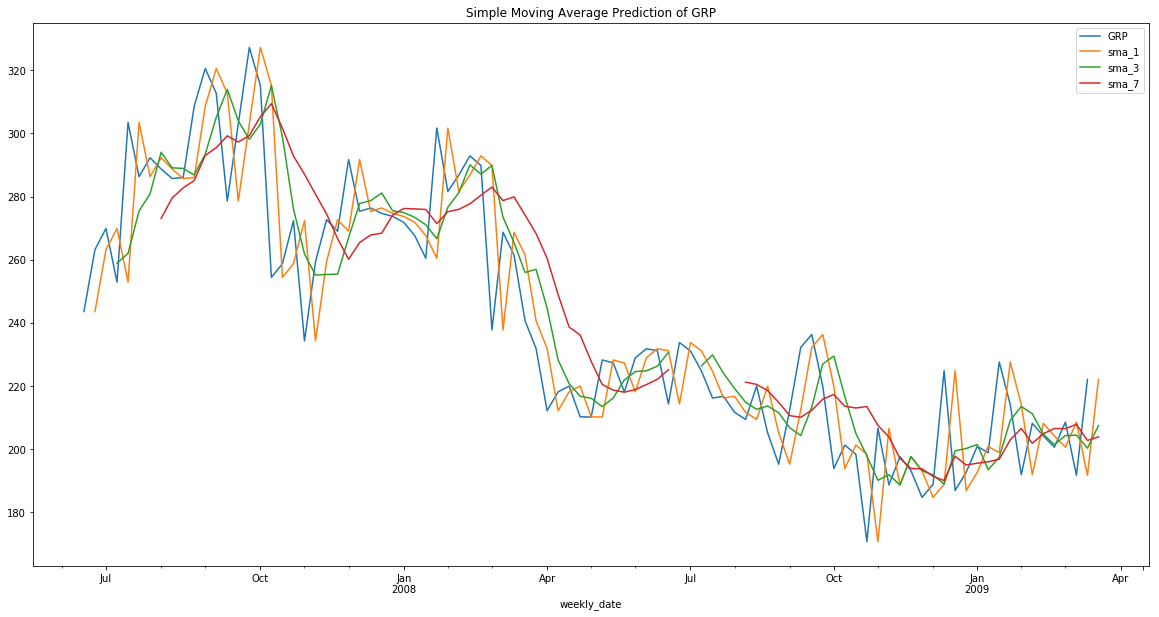

In [20]:
new_ts_df[['GRP', 'sma_1', 'sma_3', 'sma_7']].plot(figsize=(20, 10), title='Simple Moving Average Prediction of GRP')

The simple 3 week moving average model has the best MSE and plot, let's check the residuals and also stationarity of the data.

### Analysis of Residuals

In [21]:
my_df = train_ts_df.dropna()
residuals = my_df['GRP'].values - my_df['sma_3']
residuals[:10]

weekly_date
2007-08-05    -5.290000
2007-08-12    -3.396667
2007-08-19    -2.890000
2007-08-26    21.780000
2007-09-02    27.136667
2007-09-09     7.613333
2007-09-16   -35.363333
2007-09-23    -0.880000
2007-09-30    29.116667
2007-10-07    12.186667
Name: sma_3, dtype: float64

In [22]:
sma3_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
sma3_res.fit(my_df['week'].values.reshape(-1, 1), residuals)
sma3_res_pred = sma3_res.predict(my_df['week'].values.reshape(-1, 1))

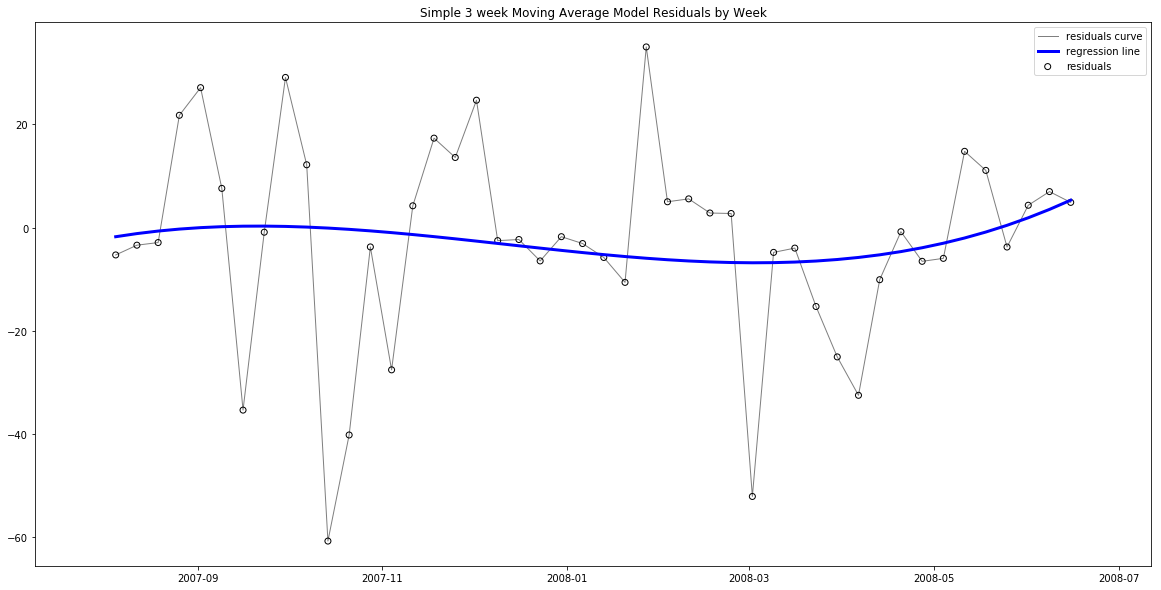

In [23]:
plt.figure(figsize=(20, 10))
plt.title('Simple 3 week Moving Average Model Residuals by Week')
plt.scatter(my_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(my_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(my_df.index.values, sma3_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

The model is well fit until towards the end of the time series.

### Check for Stationarity

The null hypothesis of the Augmented Dickey-Fuller test is that the time series data is not stationary, with the alternative that it is. If the pvalue is above a critical size, then we cannot reject that non-stationary null hypothesis. The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the null hypothesis.

In [24]:
test_df = adfuller(new_ts_df['GRP'].dropna(), autolag='AIC')
test_df

(-1.2159654278021805,
 0.66669035814933597,
 2,
 89,
 {'1%': -3.506057133647011,
  '10%': -2.5844100201994697,
  '5%': -2.8946066061911946},
 674.40002612555054)

The ADF statistic is (-1.22) < the 5% critical value (-2.89), therefore we conclude the time series data is not stationary. Note that the plot of the GRP time series data showed elements of non-stationarity as well.

## Simple Exponential Smoothing

### Reload Data

In [25]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)

### Calculate the Moving Averages for the Train Dataset

In [26]:
train_ts_df['sema_2'] = pd.ewma(train_ts_df['GRP'], span=2, min_periods=2)
train_ts_df['sema_3'] = pd.ewma(train_ts_df['GRP'], span=3, min_periods=3)
train_ts_df['sema_7'] = pd.ewma(train_ts_df['GRP'], span=7, min_periods=7)
train_ts_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=2,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=3,adjust=True,ignore_na=False).mean()
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=7,min_periods=7,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


,week,GRPRatingsDate,GRP,sema_2,sema_3,sema_7
weekly_date,,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,NaN,NaN,NaN
2007-06-24,1,24-Jun-2007 (26),263.19,258.292500,NaN,NaN
2007-07-01,2,01-Jul-2007 (27),269.89,266.321538,264.220000,NaN
2007-07-08,3,08-Jul-2007 (28),252.88,257.248500,258.172000,NaN
2007-07-15,4,15-Jul-2007 (29),303.46,288.183471,281.546452,NaN


In [27]:
sema_df = train_ts_df[['sema_2', 'sema_3', 'sema_7']].copy()
sema_df.index = sema_df.index + DateOffset(days=7)
sema_df.head()

,sema_2,sema_3,sema_7
weekly_date,,,
2007-06-24,NaN,NaN,NaN
2007-07-01,258.292500,NaN,NaN
2007-07-08,266.321538,264.220000,NaN
2007-07-15,257.248500,258.172000,NaN
2007-07-22,288.183471,281.546452,NaN


In [28]:
train_ts_df.drop(['sema_2', 'sema_3', 'sema_7'], axis=1, inplace=True)
train_ts_df = train_ts_df.join(sema_df, how='outer', sort=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP,sema_2,sema_3,sema_7
weekly_date,,,,,,
2007-06-17,0.0,17-Jun-2007 (25),243.60,NaN,NaN,NaN
2007-06-24,1.0,24-Jun-2007 (26),263.19,NaN,NaN,NaN
2007-07-01,2.0,01-Jul-2007 (27),269.89,258.292500,NaN,NaN
2007-07-08,3.0,08-Jul-2007 (28),252.88,266.321538,264.220,NaN
2007-07-15,4.0,15-Jul-2007 (29),303.46,257.248500,258.172,NaN


### Do the Same for the Test Dataset

In [29]:
test_ts_df['sema_2'] = pd.ewma(test_ts_df['GRP'], span=2, min_periods=2)
test_ts_df['sema_3'] = pd.ewma(test_ts_df['GRP'], span=3, min_periods=3)
test_ts_df['sema_7'] = pd.ewma(test_ts_df['GRP'], span=7, min_periods=7)
test_ts_df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=2,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=3,min_periods=3,adjust=True,ignore_na=False).mean()
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=7,min_periods=7,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


,week,GRPRatingsDate,GRP,sema_2,sema_3,sema_7
weekly_date,,,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,NaN,NaN,NaN
2008-06-29,54,29-Jun-2008 (27),233.76,228.900000,NaN,NaN
2008-07-06,55,06-Jul-2008 (28),231.12,230.436923,229.474286,NaN
2008-07-13,56,13-Jul-2008 (29),224.72,226.578000,226.938667,NaN
2008-07-20,57,20-Jul-2008 (30),216.19,219.624050,221.390968,NaN


In [30]:
sema_df = test_ts_df[['sema_2', 'sema_3', 'sema_7']].copy()
sema_df.index = sema_df.index + DateOffset(days=7)
sema_df.head()

,sema_2,sema_3,sema_7
weekly_date,,,
2008-06-29,NaN,NaN,NaN
2008-07-06,228.900000,NaN,NaN
2008-07-13,230.436923,229.474286,NaN
2008-07-20,226.578000,226.938667,NaN
2008-07-27,219.624050,221.390968,NaN


In [31]:
test_ts_df.drop(['sema_2', 'sema_3', 'sema_7'], axis=1, inplace=True)
test_ts_df = test_ts_df.join(sema_df, how='outer', sort=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP,sema_2,sema_3,sema_7
weekly_date,,,,,,
2008-06-22,53.0,22-Jun-2008 (26),214.32,NaN,NaN,NaN
2008-06-29,54.0,29-Jun-2008 (27),233.76,NaN,NaN,NaN
2008-07-06,55.0,06-Jul-2008 (28),231.12,228.900000,NaN,NaN
2008-07-13,56.0,13-Jul-2008 (29),224.72,230.436923,229.474286,NaN
2008-07-20,57.0,20-Jul-2008 (30),216.19,226.578000,226.938667,NaN


### Training / Test Results

In [32]:
for i in train_ts_df.columns[3:]:

    my_train_df = train_ts_df[['GRP', i]].dropna()
    sma_train_mse = mean_squared_error(my_train_df['GRP'].values, my_train_df[i].values)
    sma_train_rmse = np.sqrt(sma_train_mse)
    
    my_test_df = test_ts_df[['GRP', i]].dropna()
    sma_test_mse = mean_squared_error(my_test_df['GRP'].values, my_test_df[i].values)
    sma_test_rmse = np.sqrt(sma_test_mse)
    
    results_list.append([sma_train_mse, sma_train_rmse, sma_test_mse, sma_test_rmse])

### Plot the Predicted Results

In [33]:
# Join the train and test datasets and results for plotting.

train_ts_df.index.intersection(test_ts_df.index)

DatetimeIndex(['2008-06-22'], dtype='datetime64[ns]', name='weekly_date', freq=None)

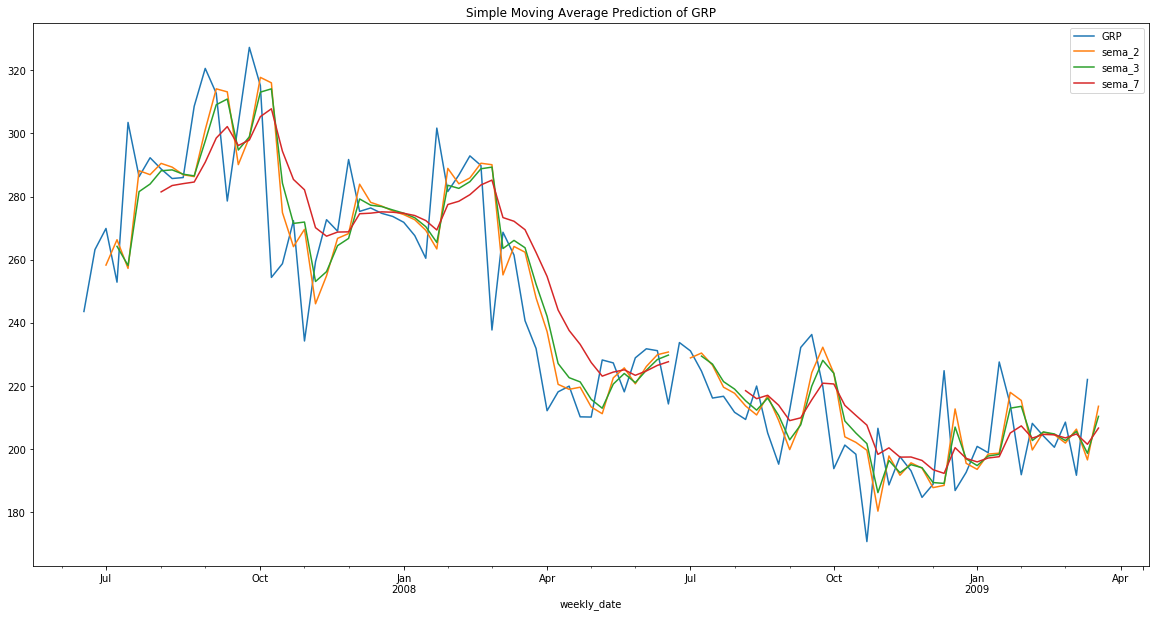

In [34]:
test_ts_df.update(train_ts_df)
train_ts_df.drop(train_ts_df.index.intersection(test_ts_df.index), inplace=True)
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'sema_2', 'sema_3', 'sema_7']].plot(figsize=(20, 10), title='Simple Moving Average Prediction of GRP')

In [44]:
results_list[5:8]

[[364.85215971696579,
  19.101103625627651,
  236.91388955957848,
  15.392007327167516],
 [372.03950781398578,
  19.288325687160764,
  226.21783454028719,
  15.040539702427143],
 [434.47505276689293,
  20.844065168937007,
  233.08216509968963,
  15.267028692567838]]

Based on the test rmse, the simple exponential smoothing model performs the best.

## Conclusion

In [36]:
results_df = pd.DataFrame(results_list,
                          index=['Simple Moving 1wk Average', 'Simple Moving 2wk Average', 'Simple Moving 3wk Average', 'Simple Moving 5wk Average', 'Simple Moving 7wk Average',
                                 'Simple Exponenting 2wk Smoothing', 'Simple Exponenting 3wk Smoothing', 'Simple Exponenting 7wk Smoothing'
                                 # "Brown's Linear Double Exponential Smoothing", "Holt's Linear Exponential Smoothing", "Additive Holt's & Winter's Method"
                                 ],
                          columns=['train mse', 'train rmse', 'test mse', 'test rmse'])
results_df

,train mse,train rmse,test mse,test rmse
Simple Moving 1wk Average,410.207683,20.253584,293.035729,17.118286
Simple Moving 2wk Average,405.648047,20.140706,251.650386,15.863492
Simple Moving 3wk Average,391.440344,19.784851,234.998135,15.329649
Simple Moving 5wk Average,441.060216,21.001434,234.417292,15.310692
Simple Moving 7wk Average,537.064327,23.174648,257.016921,16.031747
Simple Exponenting 2wk Smoothing,364.852160,19.101104,236.913890,15.392007
Simple Exponenting 3wk Smoothing,372.039508,19.288326,226.217835,15.040540
Simple Exponenting 7wk Smoothing,434.475053,20.844065,233.082165,15.267029
